In [13]:
import pandas as pd
import pickle as pkl
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import math
import warnings
pd.set_option('display.max_columns',None)

In [2]:
with open('data/full_data.pkl','rb') as f:
    df = pkl.load(f)
dfr = pd.read_csv('data/ridership.csv')

In [3]:
df.drop(['all_delays','delayed_stations','between_stations','date'],axis=1,inplace=True)

In [47]:
df

,Zerega Av (6),York St (F),WTC Cortlandt (1),Woodside-61 St (7),Woodlawn (4),Woodhaven Blvd (M/R),Woodhaven Blvd (J/Z),Winthrop St (2/5),Wilson Av (L),Whitlock Av (6),Westchester Sq-East Tremont Av (6),West Farms Sq-East Tremont Av (2/5),West 8 St-New York Aquarium (F/Q),West 4 St-Washington Sq (A/B/C/D/E/F/M),Wall St (4/5),Wall St (2/3),Wakefield-241 St (2),Vernon Blvd-Jackson Av (7),Van Siclen Av (J/Z),Van Siclen Av (C),Van Siclen Av (3),Van Cortlandt Park-242 St (1),Utica Av (A/C),Union St (R),Tremont Av (B/D),Times Sq-42 St (N/Q/R/W/S/1/2/3/7)/42 St (A/C/E),Sutter Av-Rutland Rd (3),Sutter Av (L),Sutphin Blvd-Archer Av-JFK Airport (E/J/Z),Sutphin Blvd (F),Sterling St (2/5),Steinway St (M/R),St Lawrence Av (6),Spring St (C/E),Spring St (6),South Ferry (1)/Whitehall St (R/W),Smith-9 Sts (F/G),Simpson St (2/5),Shepherd Av (C),Sheepshead Bay (B/Q),Seneca Av (M),Saratoga Av (3),Roosevelt Island (F),Rockaway Park-Beach 116 St (A/S),Rockaway Blvd (A),Rockaway Av (C),Rockaway Av (3),Rector St (R/W),Rector St (1),Ralph Av (C),Queensboro Plaza (N/W/7),Queens Plaza (E/M/R),Prospect Park (B/Q/S),Prospect Av (R),Prospect Av (2/5),Prince St (R/W),President St (2/5),Pennsylvania Av (3),Pelham Pkwy (5),Pelham Pkwy (2/5),Pelham Bay Park (6),Parsons Blvd (F),Parkside Av (Q),Parkchester (6),Park Pl (S),Ozone Park-Lefferts Blvd (A),Ocean Pkwy (Q),Nostrand Av (A/C),Nostrand Av (3),Norwood-205 St (D),Norwood Av (J/Z),Northern Blvd (M/R),Newkirk Plaza (B/Q),Newkirk Av (2/5),New Utrecht Av (N)/62 St (D),New Lots Av (L),New Lots Av (3),Nevins St (2/3/4/5),Nereid Av (2/5),Neptune Av (F),Neck Rd (Q),Nassau Av (G),Myrtle-Wyckoff Avs (L/M),Myrtle-Willoughby Avs (G),Myrtle Av (J/M/Z),Mt Eden Av (4),Mosholu Pkwy (4),Morrison Av-Soundview (6),Morris Park (5),Morgan Av (L),Montrose Av (L),Middletown Rd (6),Middle Village-Metropolitan Av (M),Mets-Willets Point (7),Marcy Av (J/M/Z),Marble Hill-225 St (1),Lorimer St (L)/Metropolitan Av (G),Lorimer St (J/M),Longwood Av (6),Livonia Av (L),Liberty Av (C),Lexington Av-63 St (F/Q),Lexington Av-53 St (E/M)/51 St (6),Lexington Av (N/R/W)/59 St (4/5/6),Lafayette Av (C),Kosciuszko St (J),Knickerbocker Av (M),Kingston-Throop Avs (C),Kingston Av (3),Kingsbridge Rd (B/D),Kingsbridge Rd (4),Kings Hwy (N),Kings Hwy (F),Kings Hwy (B/Q),Kew Gardens-Union Turnpike (E/F),Junius St (3),Junction Blvd (7),Jefferson St (L),Jay St-MetroTech (A/C/F/R),Jamaica-Van Wyck (E),Jamaica-179 St (F),Jamaica Center-Parsons-Archer (E/J/Z),Jackson Av (2/5),Inwood-207 St (A),Intervale Av (2/5),Hunts Point Av (6),Hunters Point Av (7),Hoyt-Schermerhorn Sts (A/C/G),Hoyt St (2/3),Howard Beach-JFK Airport (A),Houston St (1),High St (A/C),Hewes St (J/M),Harlem-148 St (3),Halsey St (L),Halsey St (J),Gun Hill Rd (5),Gun Hill Rd (2/5),Greenpoint Av (G),Grant Av (A),Grand St (L),Grand St (B/D),Grand Central-42 St (S/4/5/6/7),Grand Av-Newtown (M/R),Grand Army Plaza (2/3),Graham Av (L),Gates Av (J/Z),Fulton St (G),Fulton St (A/C/J/Z/2/3/4/5),Fresh Pond Rd (M),Freeman St (2/5),Franklin St (1),Franklin Av (C/S),Franklin Av (2/3/4/5)/Botanic Garden (S),Fort Hamilton Pkwy (N),Fort Hamilton Pkwy (F/G),Fort Hamilton Pkwy (D),Forest Hills-71 Av (E/F/M/R),Forest Av (M),Fordham Rd (B/D),Fordham Rd (4),Flushing-Main St (7),Flushing Av (J/M),Flushing Av (G),Flatbush Av-Brooklyn College (2/5),Far Rockaway-Mott Av (A),Euclid Av (A/C),Elmhurst Av (M/R),Elder Av (6),Eastern Pkwy-Brooklyn Museum (2/3),Eastchester-Dyre Av (5),East Broadway (F),East 180 St (2/5),East 149 St (6),East 143 St-St Mary's St (6),East 105 St (L),Dyckman St (A),Dyckman St (1),Ditmas Av (F),Delancey St (F)/Essex St (J/M/Z),DeKalb Av (L),DeKalb Av (B/Q/R),Cypress Hills (J),Cypress Av (6),Crown Heights-Utica Av (3/4),Crescent St (J/Z),Court St (R)/Borough Hall (2/3/4/5),Court Sq (E/G/M/7),Cortelyou Rd (Q),Coney Island-Stillwell Av (D/F/N/Q),Clinton-Washington Avs (G),Clinton-Washington Avs (C),Cleveland St (J),Classon Av (G),Clark St (2/3),City Hall (R/W),Church Av (F/G),Church Av (B/Q),Church Av (2/5)

In [ ]:
corr = stations_df.corr().drop(['delayed'])
x=corr[['delayed_irt']]
fig, ax = plt.subplots(figsize=(12,15))
sns.heatmap(x.sort_values(by=['delayed_irt'],ascending=0)[:20],
           annot=True,
           cmap='Reds',
           annot_kws={'fontsize':16},
           linewidth=2,
           linecolor='black',
           yticklabels=y_labels,
           xticklabels=['IRT Delay']);
ax.set_title('Features correlation with IRT delays',size=20)
ax.tick_params(labelsize=16)

In [4]:
dfr.drop('Unnamed: 0',axis=1,inplace=True)

In [44]:
dfr['median'] = dfr[['2015','2016','2017','2018','2019','2020']].median(axis=1)
top = dfr.sort_values('mean',ascending=False)[:10]
top = top[['station','mean']]

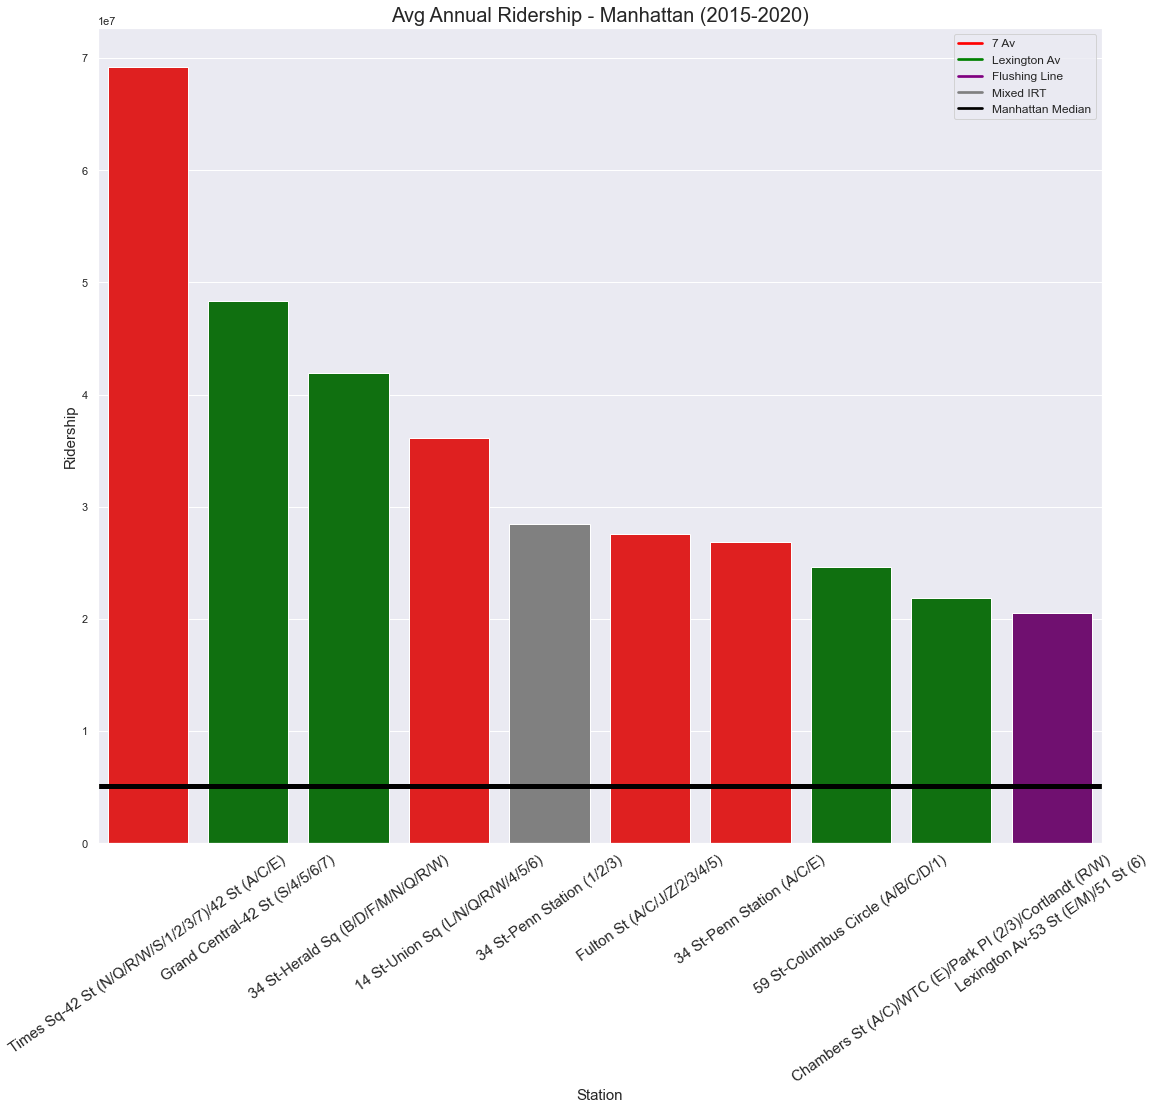

In [40]:
fig, ax = plt.subplots(figsize=(18, 15))

x = top['station']
y = top['mean']


sns.set_theme()
sns.barplot(x = x,y = y,palette=['red','green','green','red','gray','red','red','green','green','purple']).axhline(
manh_df['median'].median(),linewidth=5,color='black')
ax.set_xticklabels(labels = x,fontsize=15,rotation=35)
ax.set_title('Avg Annual Ridership - Manhattan (2015-2020)',fontsize=20)
ax.set_xlabel('Station',fontsize=15)
ax.set_ylabel('Ridership',fontsize=15)
leg = ax.legend(labels=['7 Av','Lexington Av','Flushing Line','Mixed IRT','Manhattan Median'],loc='upper right',fontsize=12);
leg.legendHandles[0].set_color('red')
leg.legendHandles[1].set_color('green')
leg.legendHandles[2].set_color('purple')
leg.legendHandles[3].set_color('gray')
leg.legendHandles[4].set_color('black')
plt.show();